In [43]:
import torch
DATA = 'Fashion'
prefix = 'fashion_cnn_kl_d_'
traing = True
epochs = 400
batch_size = 64
leaks_loss = 'KL_D'
print(torch.cuda.get_device_name(0))

Tesla P100-PCIE-16GB


In [44]:
import os
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/Colab Notebooks/BinarizeLocalize/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [45]:
pip install import-ipynb

In [46]:
import import_ipynb
os.chdir(root_path + 'library')
Call_Template = True
%run Template.ipynb

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Fetching the dataset and preparing train, validation and test data loaders

In [47]:
(trainSet, validSet, checkSet, testSet,
 trainSetGPU, validSetGPU, checkSetGPU) = load_data_to_gpu()
print(len(trainSet), len(validSet), len(checkSet), len(testSet))


60000 7000 3000 10000


##Visualising the data

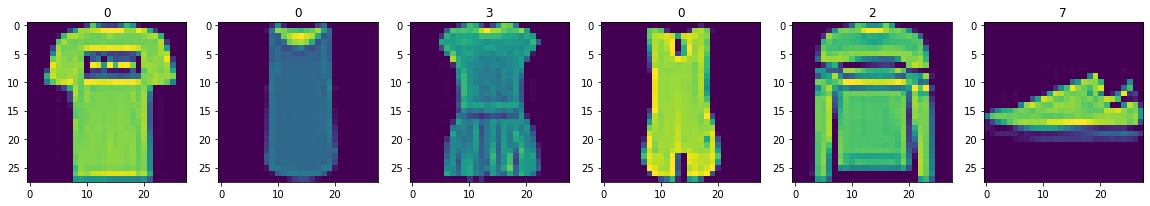

In [48]:
plot_samples(trainSet, None)

In [49]:
class Network(Model):
    def __init__(self):
        super(Network, self).__init__()
        # at client
        self.feature0 = nn.Sequential(
            nn.Conv2d(1, 6, 3, 1, 1), #28
            nn.ReLU(),
        )
        self.feature1 = nn.Sequential(
            nn.MaxPool2d(2), #14
            nn.Dropout(0.1),
        )
        # at server
        self.feature2 = nn.Sequential(
            nn.Conv2d(6, 16, 5, 1, 0), #10
            nn.ReLU(),
            nn.MaxPool2d(2), #5
            nn.Dropout(0.2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(25 * 16, 120),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(84, 10)
        )

##Defining model object, loss function and optimiser

In [50]:
(model, criterion, dataleaks, optimizer) = init_training(Network())

##Training and Validation

In [51]:
(trainLoss, validLoss, leaksLoss, accuracyList) = train_model(0,6)

Saving the model state dictionary for Epoch: 1 with Validation loss: 0.49899986 and Accuracy: 79.69%
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.41038945 and Accuracy: 84.40%
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.37621254 and Accuracy: 85.76%
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.34859273 and Accuracy: 86.96%
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.33127850 and Accuracy: 87.56%
Saving the model state dictionary for Epoch: 6 with Validation loss: 0.32358417 and Accuracy: 87.47%
Saving the model state dictionary for Epoch: 7 with Validation loss: 0.31413731 and Accuracy: 88.13%
Saving the model state dictionary for Epoch: 8 with Validation loss: 0.30828074 and Accuracy: 88.14%
Saving the model state dictionary for Epoch: 9 with Validation loss: 0.30750063 and Accuracy: 88.27%
Saving the model state dictionary for Epoch: 10 with Validation loss: 0.30248544 and Accura

In [52]:
(model, trainLoss, validLoss, leaksLoss, accuracyList) = save_and_load()

Max accuracy is tensor(0.9184, device='cuda:0')


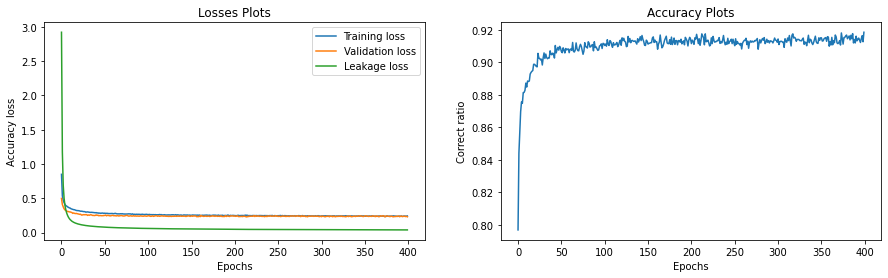

In [53]:
plot_losses()


Test accuracy: 0.911


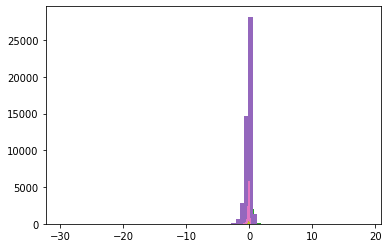

In [54]:
test_model()

##Measuring Privacy Preserving

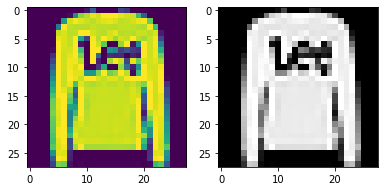

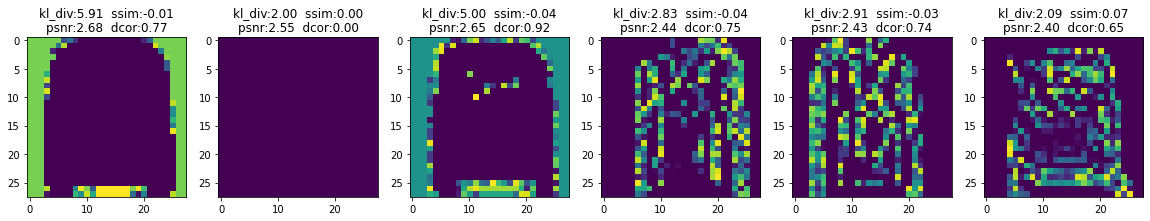

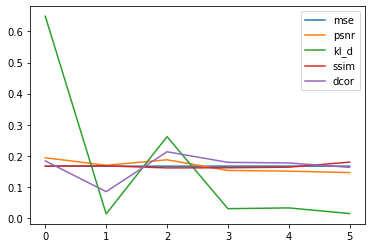

In [55]:
plot_measure(measure_image(testSet[1][0]))


tensor(2.2443, device='cuda:0') 0.6835870780584047 tensor(0.0977, device='cuda:0')


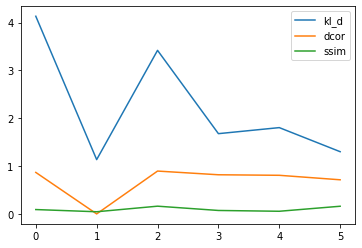

In [56]:
plot_measures(measure_images())